<a href="https://colab.research.google.com/github/Apoorv0001/Covid19-Analyzer/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize

import numpy as np
import pandas as pd
import pandas_profiling
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown

%matplotlib inline

In [ ]:
register_matplotlib_converters()

In [ ]:
def bold(string):
    display(Markdown(string))

In [ ]:
def read_from_api(URL, x=None):
    """
    Read data from API and Return Normalized JSON
    
    Keyword arguments:
    URL -- String API URL
    x -- String name to normalize API request into JSON
    """
    response = request(url=URL, method='get')
    elevations = response.json()
    return json_normalize(elevations) if x==None else json_normalize(elevations[x])

In [ ]:

''' Function to plot countplot between to columns with bins valaues [0,20,30,40,50,60,70,80,90,100] '''

def countplot(columnname1,columnname2,plotTitle):
    bins = [0,20,30,40,50,60,70,80,90,100]
    plt.figure(figsize = (14,8))
    sns.countplot(x=pd.cut(columnname1,bins), hue = columnname2 , orient = 'h')
    plt.xlabel(columnname1.name)
    plt.yscale('log')
    plt.title(plotTitle)
    plt.grid(True)
    plt.show()
    return

In [ ]:
''' Function to plot boxplot between two columns '''

def boxplot(dfname,columnname1,columnname2,plotTitle):
  plt.figure(figsize=(12, 6), dpi = 100)
  sns.boxplot(x = columnname1, y = columnname2, data = dfname, palette = 'viridis')
  plt.title(plotTitle)
  plt.xlabel(columnname1)
  plt.xticks(rotation=90) 
  plt.ylabel(columnname2)
  plt.tight_layout()
  plt.show()
  return

In [ ]:
''' Function to plot pieChart '''
  
def pieChart(dfname,columnname, plotTitle):
    fig = px.pie(dfname, values=columnname, names=dfname.index
             ,color_discrete_sequence=px.colors.sequential.Plasma_r,title=plotTitle)
    fig.update_traces(textposition='outside', textinfo='value+label')
    fig.show()
    return

In [ ]:
''' Function to plot bar chart'''

def barChart(dfname , columnname1 , columnname2, plotTitle ,barOrientation):
  fig = px.bar(dfname, x=columnname1, y=columnname2, orientation=barOrientation, text=columnname1, width=600,
       color_discrete_sequence = ['#35495e'], title=plotTitle)
  fig.update_xaxes(title=columnname1)
  fig.update_yaxes(title=columnname2)
  fig.show()
  return

In [ ]:
''' Function to plot Histogram Distribution'''

def histogramChart(dfname , columnname , plotTitle):
    fig = px.histogram(dfname, x=columnname, color_discrete_sequence = ['#35495e'], nbins=50,title=plotTitle)
    fig.show()
    return


In [ ]:
''' Function to plot Tree Map'''

def treeMapCart(dfname , columnList , valueColumn , plotTitle):
  fig = px.treemap(dfname, path=columnList, values=valueColumn, height=700,
           title=plotTitle, color_discrete_sequence = px.colors.qualitative.Prism)
  fig.data[0].textinfo = 'label+text+value'
  fig.show()
  return

In [ ]:

df_raw_data = read_from_api('https://api.covid19india.org/raw_data.json', 'raw_data')
df_death_and_recoveries = read_from_api('https://api.covid19india.org/deaths_recoveries.json','deaths_recoveries')
df_cases_time_series = read_from_api('https://api.covid19india.org/data.json','cases_time_series')
df_statewise = read_from_api('https://api.covid19india.org/data.json','statewise')
df_tested = read_from_api('https://api.covid19india.org/data.json','tested')
df_district_wise = read_from_api(URL='https://api.covid19india.org/v2/state_district_wise.json')
df_states_daily = read_from_api('https://api.covid19india.org/states_daily.json','states_daily')
df_resources = read_from_api('https://api.covid19india.org/resources/resources.json','resources')

In [ ]:
bold('**COVID19 - RAW DATA**')
df_raw_data.head()

**COVID19 - RAW DATA**

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [ ]:
bold('**COVID19 - DEATH AND RECOVERY DATA**')
df_death_and_recoveries.head()

**COVID19 - DEATH AND RECOVERY DATA**

,agebracket,city,date,district,gender,nationality,notes,patientnumbercouldbemappedlater,patientstatus,slno,source1,source2,source3,state,statecode
0,,,13/03/2020,,,,KA-P6,P74,Deceased,59,Opening Data as of Mar 29,,,Karnataka,KA
1,,,20/03/2020,,,,KA-P5,,Recovered,54,Opening Data as of Mar 29,,,Karnataka,KA
2,,,24/03/2020,,,,KA-P2,,Recovered,55,Opening Data as of Mar 29,,,Karnataka,KA
3,,,24/03/2020,,,,KA-P4,,Recovered,56,Opening Data as of Mar 29,,,Karnataka,KA
4,,,26/03/2020,,,,KA-P53,P690,Deceased,60,Opening Data as of Mar 29,,,Karnataka,KA


In [ ]:
bold('**COVID19 - CASES TIME SERIES DATA**')
df_cases_time_series.tail()

**COVID19 - CASES TIME SERIES DATA**

,dailyconfirmed,dailydeceased,dailyrecovered,date,dateymd,totalconfirmed,totaldeceased,totalrecovered
417,40636,197,29779,22 March,2021-03-22,11686277,159609,11178936
418,47239,277,23913,23 March,2021-03-23,11733516,159886,11202849
419,53419,249,26575,24 March,2021-03-24,11786935,160135,11229424
420,59084,257,32917,25 March,2021-03-25,11846019,160392,11262341
421,62276,292,30341,26 March,2021-03-26,11908295,160684,11292682


In [ ]:
bold('**COVID19 - STATEWISE DATA**')
df_statewise.head()

**COVID19 - STATEWISE DATA**

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,450004,11909225,161279,852,4,291,27/3/2021 16:30:53,4802,11293140,Total,TT,
1,282451,2637735,53907,0,0,0,26/03/2021 21:30:58,1321,2300056,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ..."
2,24270,1113723,4554,0,0,0,26/03/2021 20:25:54,314,1084585,Kerala,KL,Mahe native who expired in Kannur included in ...
3,19553,981044,12484,0,0,0,26/03/2021 18:41:50,19,948988,Karnataka,KA,
4,4145,896863,7203,0,0,0,26/03/2021 18:01:54,0,885515,Andhra Pradesh,AP,


In [ ]:
bold('**COVID19 - TESTS DATA**')
df_tested.head()

**COVID19 - TESTS DATA**

,aefi,dailyrtpcrsamplescollectedicmrapplication,firstdoseadministered,frontlineworkersvaccinated1stdose,frontlineworkersvaccinated2nddose,healthcareworkersvaccinated1stdose,healthcareworkersvaccinated2nddose,over60years1stdose,positivecasesfromsamplesreported,registrationflwhcw,registrationonline,registrationonspot,samplereportedtoday,seconddoseadministered,source,source2,source3,source4,testedasof,testsconductedbyprivatelabs,to60yearswithco-morbidities1stdose,totaldosesadministered,totalindividualstested,totalindividualsvaccinated,totalpositivecases,totalrtpcrsamplescollectedicmrapplication,totalsamplestested,totalsessionsconducted,updatetimestamp
0,,,,,,,,,,,,,,,Press_Release_ICMR_13March2020.pdf,,,,13/03/2020,,,,5900,,78,,6500,,13/03/2020 00:00:00
1,,,,,,,,,,,,,,,ICMR_website_update_18March_6PM_IST.pdf,,,,18/03/2020,,,,12235,,150,,13125,,18/03/2020 18:00:00
2,,,,,,,,,,,,,,,ICMR_website_update_19March_10AM_IST_V2.pdf,,,,19/03/2020,,,,12426,,168,,13316,,19/03/2020 10:00:00
3,,,,,,,,,,,,,,,ICMR_website_update_19March_6PM_IST.pdf,,,,19/03/2020,,,,13285,,182,,14175,,19/03/2020 18:00:00
4,,,,,,,,,,,,,,,ICMR_website_update_20March_10AM_IST.pdf,,,,20/03/2020,,,,13486,,206,,14376,,20/03/2020 10:00:00


In [ ]:
bold('**COVID19 - DISTRICTWISE DATA**')
df_district_wise.head()


**COVID19 - DISTRICTWISE DATA**

,state,statecode,districtData
0,State Unassigned,UN,"[{'district': 'Unassigned', 'notes': '', 'acti..."
1,Andaman and Nicobar Islands,AN,"[{'district': 'Nicobars', 'notes': 'District-w..."
2,Andhra Pradesh,AP,"[{'district': 'Foreign Evacuees', 'notes': '',..."
3,Arunachal Pradesh,AR,"[{'district': 'Anjaw', 'notes': '', 'active': ..."
4,Assam,AS,"[{'district': 'Airport Quarantine', 'notes': '..."


In [ ]:
bold('**COVID19 - STATES DATA**')
df_states_daily.head()

**COVID19 - STATES DATA**

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
bold('**COVID19 - ESSENTIALS AND RESOURCES DATA**')
df_resources.head()

**COVID19 - ESSENTIALS AND RESOURCES DATA**

,category,city,contact,descriptionandorserviceprovided,nameoftheorganisation,phonenumber,recordid,state
0,CoVID-19 Testing Lab,Port Blair,http://rmrc.res.in/,Government approved and supported Testing labs...,Regional Medical Research Centre (ICMR),"3192251158,\n3192251159",1,Andaman & Nicobar
1,CoVID-19 Testing Lab,Kakinada,https://web.archive.org/web/20190103062219/htt...,Government Approved and Supported Testing Lab ...,Rangaraya Medical College,8842363401,2,Andhra Pradesh
2,Free Food,Vijayawada,http://amruthahastam.org,We are providing free food service to the need...,Amrutha Hastam Charitable Trust,9246472100,3,Andhra Pradesh
3,CoVID-19 Testing Lab,Vijayawada,http://ssmctumkur.org/,Government Approved and Supported Testing Lab ...,Sidhartha Medical College,8662450390,4,Andhra Pradesh
4,Fundraisers,Visakhapatnam,http://www.irdwsi.in,Volunteers and Staff to engage in awareness bu...,The Integrated Rural Development of Weaker Sec...,9849120377,5,Andhra Pradesh


In [ ]:
print("Data Shape : Rows = {} , Columns = {}".format(df_raw_data.shape[0],df_raw_data.shape[1]))

Data Shape : Rows = 28183 , Columns = 21


In [ ]:
print("Column Names are : \n", df_raw_data.columns)

Column Names are : 
 Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'numcases', 'patientnumber', 'source1', 'source2', 'source3',
       'statecode', 'statepatientnumber', 'statuschangedate',
       'typeoftransmission'],
      dtype='object')


In [ ]:
data=df_raw_data.copy()

In [ ]:
df_raw_data.describe()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
count,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183
unique,93,223,225,4,59,512,444,33,1,3,13,931,66,27892,1234,404,115,33,2985,56,6
top,,,,Hospitalized,25/04/2020,,,Maharashtra,,,,Details awaited,1,,https://twitter.com/THMumbai/status/1254064073...,,,MH,,25/04/2020,
freq,25837,27822,26545,27954,1883,25833,6985,8284,28183,22870,25474,23180,27948,292,811,24310,27731,8284,25186,1835,25193


In [ ]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28183 entries, 0 to 28182
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   agebracket                           28183 non-null  object
 1   backupnotes                          28183 non-null  object
 2   contractedfromwhichpatientsuspected  28183 non-null  object
 3   currentstatus                        28183 non-null  object
 4   dateannounced                        28183 non-null  object
 5   detectedcity                         28183 non-null  object
 6   detecteddistrict                     28183 non-null  object
 7   detectedstate                        28183 non-null  object
 8   estimatedonsetdate                   28183 non-null  object
 9   gender                               28183 non-null  object
 10  nationality                          28183 non-null  object
 11  notes                                2818

In [ ]:
df_raw_data['agebracket'] = df_raw_data['agebracket'].replace('28-35', 35)

In [ ]:
df_raw_data['agebracket'] = pd.to_numeric(df_raw_data['agebracket'], errors='coerce')
df_raw_data['backupnotes'] = df_raw_data['backupnotes'].astype(str)
df_raw_data['contractedfromwhichpatientsuspected'] = df_raw_data['contractedfromwhichpatientsuspected'].astype(str)
df_raw_data['currentstatus'] = df_raw_data['currentstatus'].astype('category')
df_raw_data['dateannounced'] = pd.to_datetime(df_raw_data['dateannounced'])
df_raw_data['detectedcity'] = df_raw_data['detectedcity'].astype(str)
df_raw_data['detecteddistrict'] = df_raw_data['detecteddistrict'].astype(str)
df_raw_data['detectedstate'] = df_raw_data['detectedstate'].astype(str)
df_raw_data['gender']= df_raw_data['gender'].astype('category')
df_raw_data['nationality']=df_raw_data['nationality'].astype(str)
df_raw_data['notes']= df_raw_data['notes'].astype('category')
#df_raw_data['patientnumber'] = df_raw_data['patientnumber'].astype(int)
df_raw_data['source1']=df_raw_data['source1'].astype(str)
df_raw_data['source2']=df_raw_data['source2'].astype(str)
df_raw_data['source3']=df_raw_data['source3'].astype(str)
df_raw_data['statecode']=df_raw_data['statecode'].astype(str)
df_raw_data['statepatientnumber']=df_raw_data['statepatientnumber'].astype(str)
df_raw_data['statuschangedate']=pd.to_datetime(df_raw_data['statuschangedate'])
df_raw_data['typeoftransmission']=df_raw_data['typeoftransmission'].astype('category')

In [ ]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28183 entries, 0 to 28182
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   agebracket                           2346 non-null   float64       
 1   backupnotes                          28183 non-null  object        
 2   contractedfromwhichpatientsuspected  28183 non-null  object        
 3   currentstatus                        28183 non-null  category      
 4   dateannounced                        28183 non-null  datetime64[ns]
 5   detectedcity                         28183 non-null  object        
 6   detecteddistrict                     28183 non-null  object        
 7   detectedstate                        28183 non-null  object        
 8   estimatedonsetdate                   28183 non-null  object        
 9   gender                               28183 non-null  category      
 10  nationalit

In [ ]:
#df_raw_data.drop(['estimatedonsetdate', 'notes', 'contractedfromwhichpatientsuspected', 'source1', 'source2', 'source3', 'backupnotes' ], axis = 1, inplace = True)
df_raw_data.drop(['estimatedonsetdate'], axis = 1, inplace = True)
df_raw_data.sample(10)

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
3568,NaN,,,Hospitalized,2020-04-04,,Karimnagar,Telangana,,,Details awaited,1,3569,https://twitter.com/IPRTelangana/status/124647...,,,TG,,2020-04-04,
1462,NaN,,,Hospitalized,2020-03-31,,Mumbai,Maharashtra,,,Details Awaited,1,1463,https://arogya.maharashtra.gov.in/pdf/epressno...,,,MH,,2020-03-31,TBD
7184,NaN,,,Hospitalized,2020-10-04,,,Delhi,,,Details awaited,1,7185,https://twitter.com/CMODelhi/status/1248629443...,,,DL,,2020-10-04,
24355,NaN,,,Hospitalized,2020-04-24,,,Delhi,,,Details awaited,1,24298,https://twitter.com/ANI/status/125371075128771...,,,DL,,2020-04-24,
18748,NaN,,,Hospitalized,2020-04-21,,Ahmedabad,Gujarat,M,India,Details awaited,1,18691,https://twitter.com/ANI/status/125247616626854...,https://gujcovid19.gujarat.gov.in/uploads/pres...,,GJ,,2020-04-21,
7889,NaN,,,Hospitalized,2020-11-04,,Baramulla,Jammu and Kashmir,,,Details awaited,1,7890,https://twitter.com/kansalrohit69/status/12489...,,,JK,,2020-11-04,
14540,NaN,,,Hospitalized,2020-04-18,,Ahmedabad,Gujarat,M,,Details awaited,1,14540,https://twitter.com/ANI/status/125138144426337...,,,GJ,,2020-04-18,
1738,NaN,,E0,Hospitalized,2020-01-04,,Kamrup Metropolitan,Assam,,,Travelled to Delhi,1,1723,https://twitter.com/ANI/status/124527740588471...,https://twitter.com/PTI_News/status/1245280285...,,AS,,2020-01-04,Local
3662,NaN,,,Hospitalized,2020-04-04,,Mumbai,Maharashtra,,,,1,3663,https://twitter.com/rajeshtope11/status/124648...,,,MH,,NaT,
5251,NaN,,,Hospitalized,2020-07-04,,Bikaner,Rajasthan,,,Details awaited,1,5252,https://twitter.com/PIBJaipur/status/124756567...,,,RJ,,2020-07-04,


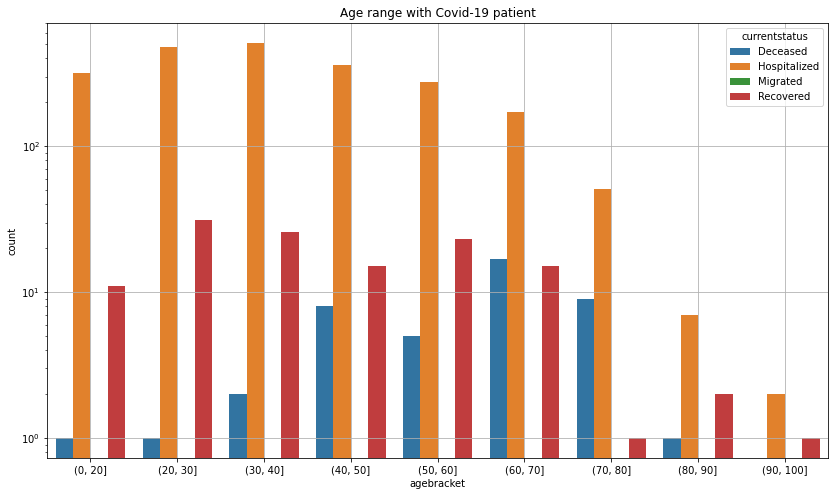

In [ ]:
countplot(df_raw_data["agebracket"],df_raw_data["currentstatus"],"Age range with Covid-19 patient")

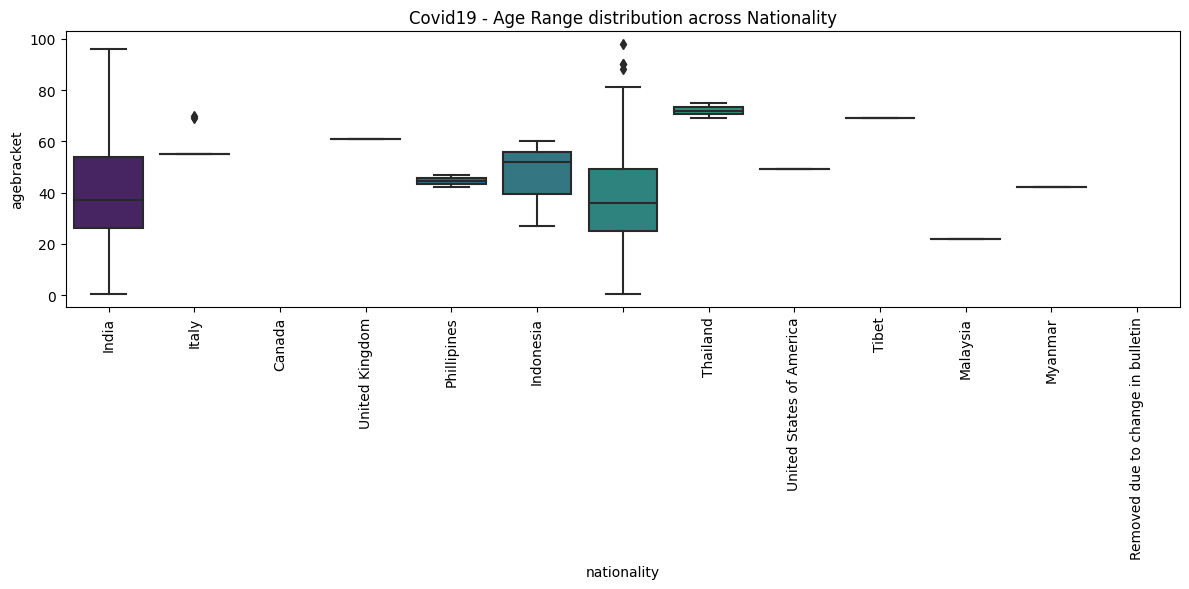

In [ ]:

boxplot(df_raw_data,"nationality","agebracket","Covid19 - Age Range distribution across Nationality")

In [ ]:
state = df_raw_data.groupby('detectedstate').count()
pieChart(state , 'currentstatus' ,'Covid19 cases based on State')

In [ ]:
nationality = df_raw_data.groupby('nationality').count()
pieChart(nationality, 'currentstatus', 'Covid19 cases based on Nationality in India')

In [ ]:

temp = df_raw_data.groupby('nationality')['patientnumber'].count().reset_index()
temp = temp.sort_values('patientnumber')
temp = temp[temp['nationality']!='']
temp = temp[temp['nationality']!='India']

barChart(temp , 'patientnumber' , 'nationality' , 'No. of foreign citizens' ,'h' )

In [ ]:
temp = pd.DataFrame(df_raw_data[['typeoftransmission']].groupby('typeoftransmission')['typeoftransmission'].count())
temp = temp.dropna()
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')

barChart(temp , 'count' , 'typeoftransmission' , 'Type of transmission','h' )

In [ ]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Cases vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'currentstatus']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('currentstatus').count()

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)

fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Deceased']['agebracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Recovered']['agebracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Hospitalized']['agebracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 28183 
No. of missing values : 25837 
No. of available values : 2346


In [ ]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'gender']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('gender').count()

fig.add_trace(go.Histogram(x=temp[temp['gender']=='F']['agebracket'], nbinsx=50, name='Female', marker_color='#6a0572'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['gender']=='M']['agebracket'], nbinsx=50, name='Male', marker_color='#39065a'), 1, 1)

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#6a0572', '#39065a']),1, 2)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'

fig.show()


Total no. of values : 28183 
No. of missing values : 25837 
No. of available values : 2346


In [ ]:
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0],
      '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0]))

histogramChart(df_raw_data,'agebracket','Distribution of ages of confirmed patients')

Total no. of values : 28183 
No. of missing values : 25837 
No. of available values : 2346


In [ ]:
dist = df_raw_data.groupby(['detectedstate', 'detecteddistrict'])['patientnumber'].count().reset_index()
dist.head()

#treeMapCart(dist, ['detectedstate', 'detecteddistrict'] , 'patientnumber' , 'Number of Confirmed Cases')


,detectedstate,detecteddistrict,patientnumber
0,,,1
1,Andaman and Nicobar Islands,North and Middle Andaman,1
2,Andaman and Nicobar Islands,South Andaman,32
3,Andhra Pradesh,,3
4,Andhra Pradesh,Anantapur,53


In [ ]:
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   active           38 non-null     object
 1   confirmed        38 non-null     object
 2   deaths           38 non-null     object
 3   deltaconfirmed   38 non-null     object
 4   deltadeaths      38 non-null     object
 5   deltarecovered   38 non-null     object
 6   lastupdatedtime  38 non-null     object
 7   migratedother    38 non-null     object
 8   recovered        38 non-null     object
 9   state            38 non-null     object
 10  statecode        38 non-null     object
 11  statenotes       38 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


In [ ]:
df_statewise.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,450004,11909225,161279,852,4,291,27/3/2021 16:30:53,4802,11293140,Total,TT,
1,282451,2637735,53907,0,0,0,26/03/2021 21:30:58,1321,2300056,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ..."
2,24270,1113723,4554,0,0,0,26/03/2021 20:25:54,314,1084585,Kerala,KL,Mahe native who expired in Kannur included in ...
3,19553,981044,12484,0,0,0,26/03/2021 18:41:50,19,948988,Karnataka,KA,
4,4145,896863,7203,0,0,0,26/03/2021 18:01:54,0,885515,Andhra Pradesh,AP,


In [ ]:
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   active           38 non-null     object
 1   confirmed        38 non-null     object
 2   deaths           38 non-null     object
 3   deltaconfirmed   38 non-null     object
 4   deltadeaths      38 non-null     object
 5   deltarecovered   38 non-null     object
 6   lastupdatedtime  38 non-null     object
 7   migratedother    38 non-null     object
 8   recovered        38 non-null     object
 9   state            38 non-null     object
 10  statecode        38 non-null     object
 11  statenotes       38 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


In [ ]:
df_statewise.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,450004,11909225,161279,852,4,291,27/3/2021 16:30:53,4802,11293140,Total,TT,
1,282451,2637735,53907,0,0,0,26/03/2021 21:30:58,1321,2300056,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ..."
2,24270,1113723,4554,0,0,0,26/03/2021 20:25:54,314,1084585,Kerala,KL,Mahe native who expired in Kannur included in ...
3,19553,981044,12484,0,0,0,26/03/2021 18:41:50,19,948988,Karnataka,KA,
4,4145,896863,7203,0,0,0,26/03/2021 18:01:54,0,885515,Andhra Pradesh,AP,


In [ ]:
print("Data Shape : Rows = {} , Columns = {}".format(df_statewise.shape[0],df_statewise.shape[1]))

Data Shape : Rows = 38 , Columns = 12


In [ ]:
print("Column Names are : \n", df_statewise.columns)

Column Names are : 
 Index(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'migratedother', 'recovered',
       'state', 'statecode', 'statenotes'],
      dtype='object')


In [ ]:
cols = ['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'recovered']


In [ ]:
df_statewise['lastupdatedtime'] = pd.to_datetime(df_statewise['lastupdatedtime'])
df_statewise[cols] = df_statewise[cols].astype(int)
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   active           38 non-null     int64         
 1   confirmed        38 non-null     int64         
 2   deaths           38 non-null     int64         
 3   deltaconfirmed   38 non-null     int64         
 4   deltadeaths      38 non-null     int64         
 5   deltarecovered   38 non-null     int64         
 6   lastupdatedtime  38 non-null     datetime64[ns]
 7   migratedother    38 non-null     object        
 8   recovered        38 non-null     int64         
 9   state            38 non-null     object        
 10  statecode        38 non-null     object        
 11  statenotes       38 non-null     object        
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 3.7+ KB


In [ ]:
statewise_cases = df_statewise[['state','active','confirmed','deaths','recovered']]
statewise_cases = statewise_cases[statewise_cases.state !='Total']

In [ ]:
statewise_cases['death_rate (per 100)'] = np.round(100*statewise_cases['deaths']/statewise_cases['confirmed'],2)

In [ ]:
statewise_cases.head()

,state,active,confirmed,deaths,recovered,death_rate (per 100)
1,Maharashtra,282451,2637735,53907,2300056,2.04
2,Kerala,24270,1113723,4554,1084585,0.41
3,Karnataka,19553,981044,12484,948988,1.27
4,Andhra Pradesh,4145,896863,7203,885515,0.80
5,Tamil Nadu,11318,875190,12650,851222,1.45


In [ ]:
statewise_cases.dropna(subset=['death_rate (per 100)'], how='all', inplace=True)

In [ ]:
print('Total Confirmed Cases: ',statewise_cases['confirmed'].sum())
print('Total Deaths: ',statewise_cases['deaths'].sum())
print('Total Recovered Cases: ',statewise_cases['recovered'].count())
print('Death Rate (per 100): ',np.round(100*statewise_cases['deaths'].sum()/statewise_cases['confirmed'].sum(),2))

Total Confirmed Cases:  11909225
Total Deaths:  161279
Total Recovered Cases:  36
Death Rate (per 100):  1.35


In [ ]:
#statewise_cases = df_statewise[['state','confirmed','active','recovered','deaths','death_rate (per 100)']]
bold("**STATE WISE CONFIRMED, DEATH AND RECOVERED CASES OF COVID-19**")
statewise_cases.sort_values('confirmed', ascending= False).style.background_gradient(cmap='YlOrBr',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Blues',subset=["active"])\
                        .background_gradient(cmap='Purples',subset=["death_rate (per 100)"])

**STATE WISE CONFIRMED, DEATH AND RECOVERED CASES OF COVID-19**

,state,active,confirmed,deaths,recovered,death_rate (per 100)
1,Maharashtra,282451,2637735,53907,2300056,2.040000
2,Kerala,24270,1113723,4554,1084585,0.410000
3,Karnataka,19553,981044,12484,948988,1.270000
4,Andhra Pradesh,4145,896863,7203,885515,0.800000
5,Tamil Nadu,11318,875190,12650,851222,1.450000
6,Delhi,6051,654276,10987,637238,1.680000
7,Uttar Pradesh,5824,611301,8779,596698,1.440000
8,West Bengal,4231,583027,10320,568476,1.770000
9,Odisha,1449,339904,1973,336482,0.580000
11,Chhattisgarh,15307,334778,4048,315423,1.210000


In [ ]:
barChart(statewise_cases , 'confirmed' , 'state' , 'Total Confirmed Cases' ,'h' )

In [ ]:
barChart(statewise_cases , 'deaths' , 'state' , 'Total Confirmed Cases' ,'h' )

In [ ]:
barChart(statewise_cases , 'recovered' , 'state' , 'Total Confirmed Cases' ,'h' )


In [ ]:
barChart(statewise_cases , 'active' , 'state' , 'Total Confirmed Cases' ,'h' )


In [ ]:
barChart(statewise_cases , 'death_rate (per 100)' , 'state' , 'Total Confirmed Cases' ,'h' )

In [ ]:
def statelat(state):
    lat = {
        "Maharashtra":19.7515,
        "Delhi":28.7041,
        "Tamil Nadu":11.1271,
        "Rajasthan":27.0238,
        "Madhya Pradesh":22.9734,
        "Telangana":18.1124,
        "Gujarat":22.2587,
        "Uttar Pradesh":26.8467,
        "Andhra Pradesh":15.9129,
        "Kerala":10.8505,
        "Jammu and Kashmir":33.7782,
        "Karnataka":15.3173,
        "Haryana":29.0588,
        "Punjab":31.1471,
        "West Bengal":22.9868,
        "Bihar":25.0961,
        "Odisha":20.9517,
        "Uttarakhand":30.0668,
        "Himachal Pradesh":31.1048,
        "Assam":26.2006,
        "Chhattisgarh":22.0797,
        "Chandigarh":30.7333,
        "Jharkhand":23.6102,
        "Ladakh":34.152588,
        "Andaman and Nicobar Islands":11.7401,
        "Goa":15.2993,
        "Puducherry":11.9416,
        "Manipur":24.6637,
        "Tripura":23.9408,
        "Mizoram":23.1645,
        "Arunachal Pradesh":28.2180,
        "Dadra and Nagar Haveli":20.1809,
        "Nagaland":26.1584,
        "Daman and Diu":20.4283,
        "Lakshadweep":8.295441,
        "Meghalaya":25.4670,
        "Sikkim":27.5330
    }
    return lat[state]

In [ ]:
def statelong(state):
    long = {
        "Maharashtra":75.7139,
        "Delhi":77.1025,
        "Tamil Nadu":78.6569,
        "Rajasthan":74.2179,
        "Madhya Pradesh":78.6569,
        "Telangana":79.0193,
        "Gujarat":71.1924,
        "Uttar Pradesh":80.9462,
        "Andhra Pradesh":79.7400,
        "Kerala":76.2711,
        "Jammu and Kashmir":76.5762,
        "Karnataka":75.7139,
        "Haryana":76.0856,
        "Punjab":75.3412,
        "West Bengal":87.8550,
        "Bihar":85.3131,
        "Odisha":85.0985,
        "Uttarakhand":79.0193,
        "Himachal Pradesh":77.1734,
        "Assam":92.9376,
        "Chhattisgarh":82.1409,
        "Chandigarh":76.7794,
        "Jharkhand":85.2799,
        "Ladakh":77.577049,
        "Andaman and Nicobar Islands":92.6586,
        "Goa":74.1240,
        "Puducherry":79.8083,
        "Manipur":93.9063,
        "Tripura":91.9882,
        "Mizoram":92.9376,
        "Arunachal Pradesh":94.7278,
        "Dadra and Nagar Haveli":73.0169,
        "Nagaland":94.5624,
        "Daman and Diu":72.8397,
        "Lakshadweep":73.048973,
        "Meghalaya":91.3662,
        "Sikkim":88.5122
    }
    return long[state]

In [ ]:
len(statewise_cases)

36